In [1]:
import pandas as pd
import json 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from biom import load_table

#turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load joint-rpca runtime
joint_rpca_runtime = pd.read_csv('../results/ihmp-joint-rpca-runtime.csv', index_col=0)
joint_rpca_runtime.reset_index(inplace=True)
joint_rpca_runtime

,index,time (s),factor,method,n features
0,0,1.223706,0.00,Joint-RPCA,9562
1,1,1.283670,0.01,Joint-RPCA,10380
2,2,1.837933,0.03,Joint-RPCA,12018
3,3,1.932425,0.05,Joint-RPCA,13655
4,4,3.457007,0.10,Joint-RPCA,17748
5,5,4.316535,0.15,Joint-RPCA,21842
6,6,6.031864,0.30,Joint-RPCA,27428
7,7,7.704982,0.35,Joint-RPCA,32000
8,8,9.098438,0.40,Joint-RPCA,36571
9,9,29.136795,1.00,Joint-RPCA,91429


In [6]:
#make dict with factor as key and n features as values
factor_to_n = dict(zip(joint_rpca_runtime['factor'], joint_rpca_runtime['n features']))

In [7]:
#load mmvec runtime
with open('../results/mmvec-runtime-total.json') as f:
    mmvec_runtime = json.load(f)

mmvec_runtime_df = pd.DataFrame(mmvec_runtime.items(), columns=['factor', 'time (s)'])
mmvec_runtime_df['factor'] = mmvec_runtime_df['factor'].astype(float)
mmvec_runtime_df.sort_values('factor', inplace=True)
mmvec_runtime_df['method'] = 'MMvec'
mmvec_runtime_df['n features'] = mmvec_runtime_df['factor'].map(factor_to_n)
mmvec_runtime_df['index'] = range(0, len(mmvec_runtime_df))
mmvec_runtime_df

,factor,time (s),method,n features,index
1,0.00,1309.905422,MMvec,9562,0
0,0.01,2027.853860,MMvec,10380,1
2,0.03,4931.285890,MMvec,12018,2
3,0.05,10655.771703,MMvec,13655,3
4,0.10,49187.657999,MMvec,17748,4
5,0.15,128819.163206,MMvec,21842,5


In [8]:
##append mmvec runtime to joint-rpca runtime
runtime_df = pd.concat([joint_rpca_runtime, mmvec_runtime_df], join='outer')
runtime_df = runtime_df[['index','method', 'factor', 'n features','time (s)']]
#add column with % features
runtime_df['% features'] = round(100*(runtime_df['n features']/91429),2)
runtime_df

,index,method,factor,n features,time (s),% features
0,0,Joint-RPCA,0.00,9562,1.223706,10.46
1,1,Joint-RPCA,0.01,10380,1.283670,11.35
2,2,Joint-RPCA,0.03,12018,1.837933,13.14
3,3,Joint-RPCA,0.05,13655,1.932425,14.94
4,4,Joint-RPCA,0.10,17748,3.457007,19.41
5,5,Joint-RPCA,0.15,21842,4.316535,23.89
6,6,Joint-RPCA,0.30,27428,6.031864,30.00
7,7,Joint-RPCA,0.35,32000,7.704982,35.00
8,8,Joint-RPCA,0.40,36571,9.098438,40.00
9,9,Joint-RPCA,1.00,91429,29.136795,100.00


In [7]:
#save dataframe
#runtime_df.to_csv('../results/ihmp-runtime-all.csv', index=False)

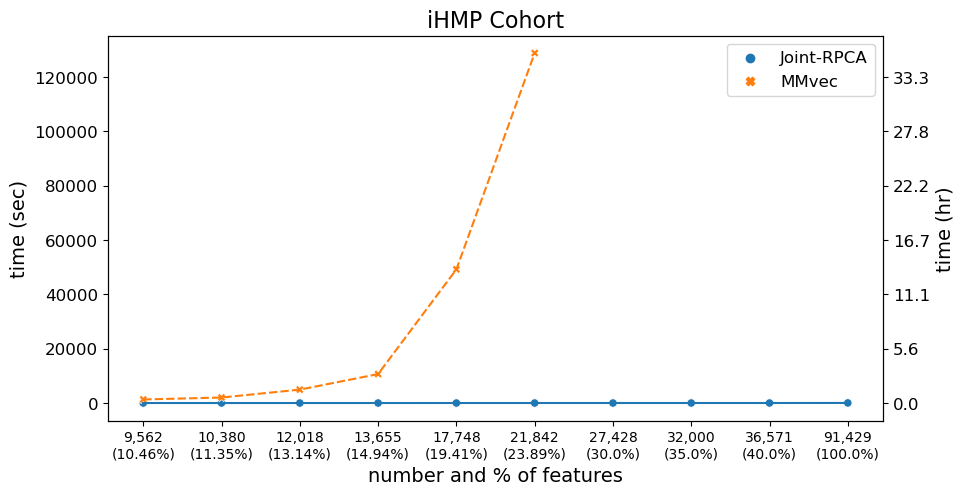

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=runtime_df, x='index', y='time (s)', 
                hue='method', style='method')
sns.lineplot(data=runtime_df, x='index', y='time (s)', 
                hue='method', style='method')
#increase font size
plt.ylabel('time (sec)', fontsize=14)
plt.yticks(fontsize=12)

#keep only half of the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], fontsize=12)

#get yticks
y_lim1 = plt.ylim()
y_ticks = plt.gca().get_yticks()

#change xticks labels
x_labels = ['{:,}\n({}%)'.format(round(n), p) for p, n in zip(runtime_df['% features'][0:10], 
                                                              runtime_df['n features'][0:10])]
plt.xticks(list(range(0,10)), x_labels, fontsize=10)
plt.xlabel('number and % of features', fontsize=14)

#add second y axis with minutes instead of seconds
plt.twinx()
time_in_hr = [round(t / 3600, 1) for t in y_ticks]
plt.yticks(y_ticks, labels=time_in_hr, fontsize=12)
plt.ylabel('time (hr)', fontsize=14)
plt.ylim(y_lim1)  # Match the y-axis limits

plt.title('iHMP Cohort', fontsize=16)
plt.show()

### Repeat for UC cohort

In [14]:
#load joint-rpca runtime
joint_rpca_runtime_uc = pd.read_csv('../results/uc-joint-rpca-runtime.csv', index_col=0)
joint_rpca_runtime_uc.reset_index(inplace=True)
joint_rpca_runtime_uc

,index,time (s),% features,n features,method
0,0,4.598135,10.46,11880,Joint-RPCA
1,1,4.730030,11.35,12890,Joint-RPCA
2,2,5.828597,13.14,14923,Joint-RPCA
3,3,6.154361,14.94,16968,Joint-RPCA
4,4,8.300842,19.41,22045,Joint-RPCA
5,5,9.971474,23.89,27133,Joint-RPCA
6,6,13.201322,30.00,34072,Joint-RPCA
7,7,16.923151,35.00,39751,Joint-RPCA
8,8,17.198471,40.00,45430,Joint-RPCA
9,9,67.660998,100.00,113576,Joint-RPCA


In [19]:
index_to_n = dict(zip(joint_rpca_runtime_uc['index'], joint_rpca_runtime_uc['n features']))
index_to_p = dict(zip(joint_rpca_runtime_uc['index'], joint_rpca_runtime_uc['% features']))

In [20]:
#load mmvec runtime
with open('../results/mmvec-runtime-total-uc.json') as f:
    mmvec_runtime_uc = json.load(f)

mmvec_runtime_uc_df = pd.DataFrame(mmvec_runtime_uc.items(), columns=['factor', 'time (s)'])
#drop factor column
mmvec_runtime_uc_df.drop(columns=['factor'], inplace=True)
mmvec_runtime_uc_df['method'] = 'MMvec'
mmvec_runtime_uc_df.reset_index(inplace=True)
#add column with % features and n features
mmvec_runtime_uc_df['n features'] = mmvec_runtime_uc_df['index'].map(index_to_n)
mmvec_runtime_uc_df['% features'] = mmvec_runtime_uc_df['index'].map(index_to_p)
mmvec_runtime_uc_df

,index,time (s),method,n features,% features
0,0,3035.739473,MMvec,11880,10.46
1,1,4827.727399,MMvec,12890,11.35
2,2,12523.729010,MMvec,14923,13.14
3,3,372350.007642,MMvec,16968,14.94


In [23]:
##append mmvec runtime to joint-rpca runtime
runtime_df_uc = pd.concat([joint_rpca_runtime_uc, mmvec_runtime_uc_df], join='outer')
runtime_df_uc = runtime_df_uc[['index', 'time (s)', 'method', 'n features', '% features']]
runtime_df_uc

,index,time (s),method,n features,% features
0,0,4.598135,Joint-RPCA,11880,10.46
1,1,4.730030,Joint-RPCA,12890,11.35
2,2,5.828597,Joint-RPCA,14923,13.14
3,3,6.154361,Joint-RPCA,16968,14.94
4,4,8.300842,Joint-RPCA,22045,19.41
5,5,9.971474,Joint-RPCA,27133,23.89
6,6,13.201322,Joint-RPCA,34072,30.00
7,7,16.923151,Joint-RPCA,39751,35.00
8,8,17.198471,Joint-RPCA,45430,40.00
9,9,67.660998,Joint-RPCA,113576,100.00


In [26]:
#save dataframe
runtime_df_uc.to_csv('../results/uc-runtime-all.csv', index=False)

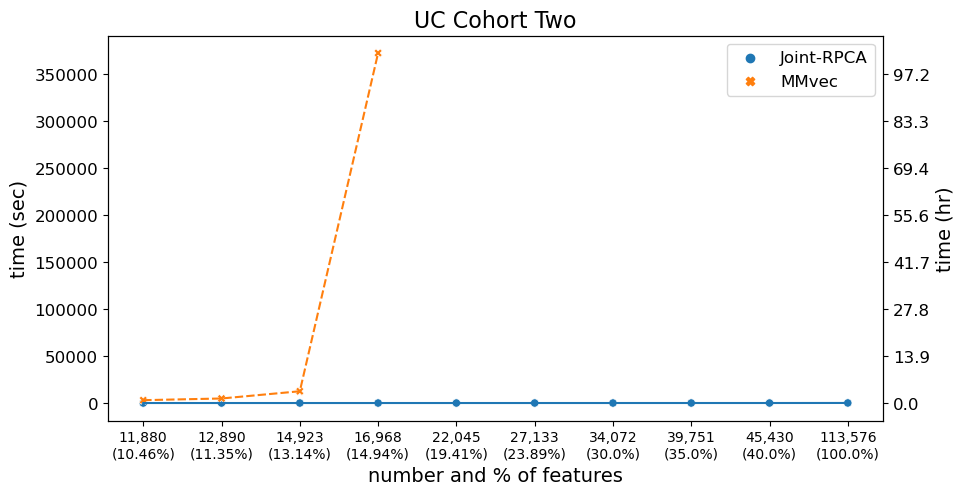

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=runtime_df_uc, x='index', y='time (s)', 
                hue='method', style='method')
sns.lineplot(data=runtime_df_uc, x='index', y='time (s)', 
                hue='method', style='method')
#increase font size
plt.ylabel('time (sec)', fontsize=14)
plt.yticks(fontsize=12)

#keep only half of the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], fontsize=12)

#get yticks
y_lim1 = plt.ylim()
y_ticks = plt.gca().get_yticks()

#change xticks labels
x_labels = ['{:,}\n({}%)'.format(round(n), p) for p, n in zip(runtime_df_uc['% features'][0:10], 
                                                              runtime_df_uc['n features'][0:10])]
plt.xticks(list(range(0,10)), x_labels, fontsize=10)
plt.xlabel('number and % of features', fontsize=14)

#add second y axis with minutes instead of seconds
plt.twinx()
time_in_hr = [round(t / 3600, 1) for t in y_ticks]
plt.yticks(y_ticks, labels=time_in_hr, fontsize=12)
plt.ylabel('time (hr)', fontsize=14)
plt.ylim(y_lim1)  # Match the y-axis limits

plt.title('UC Cohort Two', fontsize=16)
plt.show()